In [197]:
import math
import h5py
import numpy as np
from setutil import Ktp as K
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 5]

h5File=h5py.File('frames20k.h5','r')
frames=h5File['/frames']
ds_keys=list(frames.keys())
ds_keys.sort(key=int)
#print(ds_keys)

[ 9675 12484   580  9515]


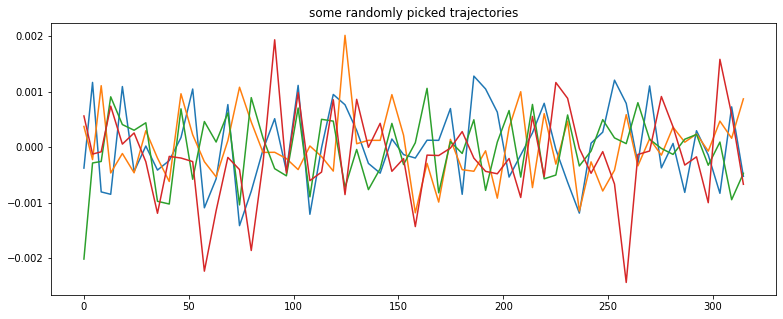

In [198]:
pnumbers = np.random.randint(0,15040,4)
print(pnumbers)
for part in pnumbers:
    absc = []  # abscisse
    ordi = []  # ordinate
    for cnt,k in enumerate(ds_keys):
        ds=frames[k]
        try:
            xk=ds[part,K.S]  # x Koordinate
            yk=ds[part,K.x]  # y Koordinate
        except:
            pass
        absc.append(xk)
        ordi.append(yk)
    plt.plot(absc,ordi)
    plt.title('some randomly picked trajectories')
plt.show()

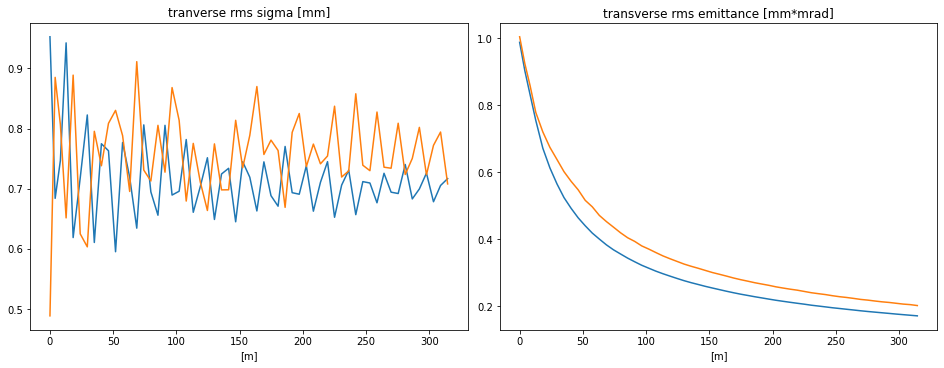

In [199]:
def plt_beam_transverse(frames,ds_keys,ko):
    sigma     = []
    sigmap    = []
    emittance = []
    abscisse  = []
    (v1,v2)   = ko   # the 2 variables to correlate, f.i. (x,xp) or (y,yp)
    for f_cnt,frame_key in enumerate(ds_keys):
        # dataset is 2D array: row=particle index column=track point
        # track point is 1D array: [x,x',...,S,1] of length 10
        dataset=frames[frame_key]
        abscisse.append(dataset[0,K.S])
        # get 2 coordinate sets from dataset
        all_x = [i[v1] for i in dataset]
        all_xp= [i[v2] for i in dataset]
        # calculate covarince matrix between those 2 coordinates
        cxxp=np.cov(np.array([all_x,all_xp]))
        # get sigmas and emittance forn covariance matrix
        sig  = math.sqrt(cxxp[0,0])
        sigp = math.sqrt(cxxp[1,1])
        emit = math.sqrt(np.linalg.det(cxxp))
    #     print(f'{f_cnt} sigx{sig}, sigp={sigp}, emitx={emit}')
        sigma.append(sig)
        sigmap.append(sigp)
        emittance.append(emit)
    return (abscisse,sigma,sigmap,emittance)

# prepare data
abscissex, sigmax, sigmaxp, emittx = plt_beam_transverse(frames,ds_keys,(K.x,K.xp))
abscissey, sigmay, sigmayp, emitty = plt_beam_transverse(frames,ds_keys,(K.y,K.yp))

# scale variables
sigmax  = [i*1e3 for i in sigmax]
sigmaxp = [i*1e3 for i in sigmaxp]
sigmay  = [i*1e3 for i in sigmay]
sigmayp = [i*1e3 for i in sigmayp]
emittx  = [i*1e6 for i in emittx]
emitty  = [i*1e6 for i in emitty]

# setup plots
fig, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].set_title('tranverse rms sigma [mm]')
ax[0].set_xlabel('[m]')
ax[0].plot(abscisse,sigmax)
ax[0].plot(abscisse,sigmay)
ax[1].set_title('transverse rms emittance [mm*mrad]')
ax[1].set_xlabel('[m]')
ax[1].plot(abscisse,emittx)
ax[1].plot(abscisse,emitty)
plt.show()

In [200]:
h5File.close()